In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

from datetime import datetime
from datetime import date

In [43]:
# importing the processed data
df_model = pd.read_csv("../inter_data/processed_catboost.csv")
df_model_enc = pd.read_csv("../inter_data/processed_encoded.csv")

In [44]:
df_model = df_model[list(col for col in df_model.columns if "Unnam" not in col)]


### Catboost


In [45]:
df_model

,client_code,KRA YN,IsKarvy,cm_sex,IncomePA,IsDormant,E2Channel,age,months_since_last_login,months_since_last_futures_trade,months_since_last_options_trade,months_since_last_intraday_trade,months_since_last_delivery_trade,THV,ALB,Z20,total_logins_one_year,total_trades_one_year,target
0,RAPT1001,Y,0.0,M,5_10L,N,Franchisee,34.0,132.000000,132.0,132.000000,132.000000,3.704233,0.0,0.18,1.0,0.0,1.0,0.0
1,OPA10002,Y,0.0,M,5_10L,N,Franchisee,25.0,0.221616,132.0,132.000000,2.981426,3.211410,0.0,5.77,1.0,266.0,36.0,1.0
2,52093616,Y,0.0,M,1_5L,N,CAT,46.0,0.155906,132.0,132.000000,0.911568,0.155906,27634.0,7214.16,1.0,493.0,131.0,1.0
3,SIG10103,Y,0.0,M,5_10L,N,Franchisee,36.0,0.287325,132.0,1.535811,132.000000,2.094344,14693.0,0.15,1.0,282.0,52.0,1.0
4,SANJU037,N,0.0,M,1_5L,N,GL Investments,32.0,0.287325,132.0,3.375684,3.441394,3.375684,0.0,-3.88,0.0,207.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320627,97284873,N,0.0,M,<=1L,N,CAT,26.0,5.544107,132.0,132.000000,5.938365,132.000000,0.0,1.83,1.0,31.0,7.0,0.0
320628,79307640,Y,0.0,M,5_10L,N,CAT,39.0,0.155906,132.0,132.000000,132.000000,0.484455,0.0,4505.90,1.0,356.0,4.0,0.0
320629,57268114,Y,0.0,M,5_10L,N,Franchisee,36.0,0.155906,132.0,132.000000,1.798650,1.404391,0.0,410.63,1.0,1625.0,125.0,0.0
320630,18895274,N,0.0,F,<=1L,N,CAT,26.0,0.550164,132.0,132.000000,4.098492,132.000000,0.0,2.43,1.0,76.0,3.0,0.0


In [46]:
X = df_model.drop("target", axis=1)
y = df_model["target"]


In [47]:
df_model.describe()

,IsKarvy,age,months_since_last_login,months_since_last_futures_trade,months_since_last_options_trade,months_since_last_intraday_trade,months_since_last_delivery_trade,THV,ALB,Z20,total_logins_one_year,total_trades_one_year,target
count,320632.000000,320632.000000,320632.000000,320632.000000,320632.000000,320632.000000,320632.000000,3.206320e+05,3.206320e+05,320632.000000,320632.000000,320632.000000,320632.000000
mean,0.114268,33.562748,43.793382,131.223284,127.777326,118.007426,1.646849,4.356717e+04,2.437778e+03,0.727077,78.522381,22.725271,0.160692
std,0.318137,13.377126,60.748354,8.730243,22.248449,38.890579,8.108225,1.363942e+06,1.872078e+05,0.445463,413.337638,642.720854,0.367247
min,0.000000,0.000000,0.155906,0.155906,0.155906,0.155906,0.155906,0.000000e+00,-7.320931e+07,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,0.254470,132.000000,132.000000,132.000000,0.583019,0.000000e+00,1.800000e-01,0.000000,0.000000,1.000000,0.000000
50%,0.000000,30.000000,1.404391,132.000000,132.000000,132.000000,1.075843,0.000000e+00,7.700000e-01,1.000000,5.000000,1.000000,0.000000
75%,0.000000,40.000000,132.000000,132.000000,132.000000,132.000000,1.601521,0.000000e+00,2.100000e+00,1.000000,27.000000,1.000000,0.000000
max,1.000000,121.000000,132.000000,132.823928,132.856783,133.053912,132.000000,3.419104e+08,5.030694e+07,1.000000,30177.000000,183339.000000,1.000000


In [48]:
pd.DataFrame(df_model.nunique()).rename(columns = {0: "num_unique"})

,num_unique
client_code,320632
KRA YN,2
IsKarvy,2
cm_sex,5
IncomePA,8
IsDormant,2
E2Channel,6
age,103
months_since_last_login,1903
months_since_last_futures_trade,1721


In [49]:
X


,client_code,KRA YN,IsKarvy,cm_sex,IncomePA,IsDormant,E2Channel,age,months_since_last_login,months_since_last_futures_trade,months_since_last_options_trade,months_since_last_intraday_trade,months_since_last_delivery_trade,THV,ALB,Z20,total_logins_one_year,total_trades_one_year
0,RAPT1001,Y,0.0,M,5_10L,N,Franchisee,34.0,132.000000,132.0,132.000000,132.000000,3.704233,0.0,0.18,1.0,0.0,1.0
1,OPA10002,Y,0.0,M,5_10L,N,Franchisee,25.0,0.221616,132.0,132.000000,2.981426,3.211410,0.0,5.77,1.0,266.0,36.0
2,52093616,Y,0.0,M,1_5L,N,CAT,46.0,0.155906,132.0,132.000000,0.911568,0.155906,27634.0,7214.16,1.0,493.0,131.0
3,SIG10103,Y,0.0,M,5_10L,N,Franchisee,36.0,0.287325,132.0,1.535811,132.000000,2.094344,14693.0,0.15,1.0,282.0,52.0
4,SANJU037,N,0.0,M,1_5L,N,GL Investments,32.0,0.287325,132.0,3.375684,3.441394,3.375684,0.0,-3.88,0.0,207.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320627,97284873,N,0.0,M,<=1L,N,CAT,26.0,5.544107,132.0,132.000000,5.938365,132.000000,0.0,1.83,1.0,31.0,7.0
320628,79307640,Y,0.0,M,5_10L,N,CAT,39.0,0.155906,132.0,132.000000,132.000000,0.484455,0.0,4505.90,1.0,356.0,4.0
320629,57268114,Y,0.0,M,5_10L,N,Franchisee,36.0,0.155906,132.0,132.000000,1.798650,1.404391,0.0,410.63,1.0,1625.0,125.0
320630,18895274,N,0.0,F,<=1L,N,CAT,26.0,0.550164,132.0,132.000000,4.098492,132.000000,0.0,2.43,1.0,76.0,3.0


In [50]:

# declaring categorical features for catboost model
cat_features = ["KRA YN", "IsKarvy", "cm_sex", "IncomePA", "IsDormant", "E2Channel", "Z20"]



In [51]:

# removing client_code
X = X.drop("client_code", axis = 1)

X["IsKarvy"] = X["IsKarvy"].astype(int)
X["Z20"] = X["Z20"].astype(int)


In [52]:

# train test split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)


In [58]:

from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


cat_clf.fit(X_train, y_train, 
        cat_features=cat_features, 
        eval_set=(X_val, y_val), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(cat_clf.is_fitted()))
print('CatBoost model parameters:')
print(cat_clf.get_params())



from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(
    iterations=75,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy', 'Recall']
)

cat_clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
    verbose=True,
    plot=True
)



CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3729105	test: 0.3734852	best: 0.3734852 (0)	total: 45.5ms	remaining: 3.37s
1:	learn: 0.2515340	test: 0.2523051	best: 0.2523051 (1)	total: 73.5ms	remaining: 2.68s
2:	learn: 0.1909433	test: 0.1919921	best: 0.1919921 (2)	total: 105ms	remaining: 2.51s
3:	learn: 0.1558465	test: 0.1573157	best: 0.1573157 (3)	total: 133ms	remaining: 2.36s
4:	learn: 0.1378463	test: 0.1391429	best: 0.1391429 (4)	total: 169ms	remaining: 2.36s
5:	learn: 0.1235699	test: 0.1250204	best: 0.1250204 (5)	total: 198ms	remaining: 2.27s
6:	learn: 0.1152449	test: 0.1167017	best: 0.1167017 (6)	total: 226ms	remaining: 2.19s
7:	learn: 0.1097052	test: 0.1112665	best: 0.1112665 (7)	total: 254ms	remaining: 2.13s
8:	learn: 0.1070187	test: 0.1087611	best: 0.1087611 (8)	total: 288ms	remaining: 2.11s
9:	learn: 0.1029678	test: 0.1046284	best: 0.1046284 (9)	total: 317ms	remaining: 2.06s
10:	learn: 0.1018593	test: 0.1033436	best: 0.1033436 (10)	total: 345ms	remaining: 2.01s
11:	learn: 0.0994432	test: 0.1007845	best: 0.10078

In [59]:

y_train_pred = cat_clf.predict(X_train)
train_result = pd.DataFrame({'Converted':y_train, 'Converted_prob':y_train_pred, "prospect_ID": y_train.index})


Text(0.5, 0, 'False Positive Rate')

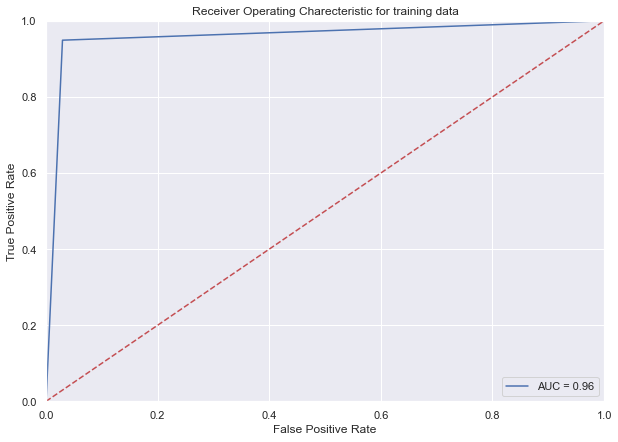

In [60]:

import sklearn.metrics as metrics
sns.set(rc={'figure.figsize':(10,7)})

fpr, tpr, threshold = metrics.roc_curve(y_train, y_train_pred)
roc_auc = metrics.auc(fpr, tpr)


plt.title("Receiver Operating Charecteristic for training data")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


Text(0.5, 0, 'False Positive Rate')

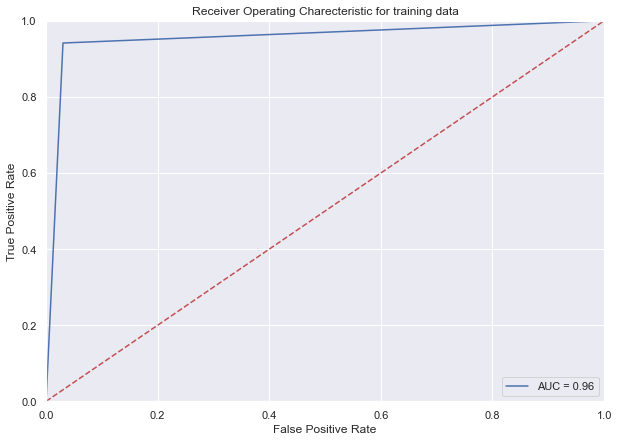

In [61]:

y_val_pred = cat_clf.predict(X_val)
val_result = pd.DataFrame({'Converted':y_val, 'Converted_prob':y_val_pred, "prospect_ID": y_val.index})

import sklearn.metrics as metrics
sns.set(rc={'figure.figsize':(10,7)})

fpr, tpr, threshold = metrics.roc_curve(y_val, y_val_pred)
roc_auc = metrics.auc(fpr, tpr)


plt.title("Receiver Operating Charecteristic for training data")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


#### saving catboost model

In [62]:
try:
    !mkdir ../models
except:
    pass
cat_clf.save_model('../models/catboost_classifier')


# from catboost import CatBoostClassifier
# model = CatBoostClassifier()      # parameters not required.
# model.load_model('../models/catboost_classifier')


mkdir: ../models: File exists
